In [31]:
import numpy as np
import os
import vis
import pandas as pd
import joblib
import seaborn as sns
from matplotlib import pyplot as plt

def load_inference_data(datapath, ):
    data = load_file(datapath)
    _ = data.pop('datetime')
    _ = data.pop('time')
    _ = data.pop('temperature')
    if 'moving average' in data.keys():
        data['moving_average'] = data['moving average']
        _ = data.pop('moving average')
    return data, data['moving_average'].shape

def load_file(datapath):
    with open(datapath, 'rb') as file:
        data = joblib.load(file)
        file.close()
    return data

# Inference Evaluation

Generic script for inference run evaluation. For any feature dataset generated using a PALM simulation file for reference and PALM humidties, the inference / test error can be calculated by loading in the reference simulation file. 

In [6]:
# PATHS
resultdir = 'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/QRF Inference/2023-11-28_16.30/'
resultpath = os.path.join(resultdir, os.path.basename(os.path.normpath(resultdir)) + '.json')
inferencedatapath = 'C:/Users/ushe/Documents/LinuxDownload/mb_6_multi_stations_LCZ_xy_N02.00m_palmhumi.json'
# inferencedatapath = 'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/QRF Feature Maps/'

# DATA
results = load_file(resultpath)
inferencedata = load_file(inferencedatapath)




In [13]:
inferencedata.keys()

dict_keys(['datetime', 'time', 'altitude', 'buildings', 'buildings_10', 'buildings_30', 'buildings_100', 'buildings_200', 'buildings_500', 'forests', 'forests_10', 'forests_30', 'forests_100', 'forests_200', 'forests_500', 'pavedsurfaces', 'pavedsurfaces_10', 'pavedsurfaces_30', 'pavedsurfaces_100', 'pavedsurfaces_200', 'pavedsurfaces_500', 'surfacewater', 'surfacewater_10', 'surfacewater_30', 'surfacewater_100', 'surfacewater_200', 'surfacewater_500', 'urbangreen', 'urbangreen_10', 'urbangreen_30', 'urbangreen_100', 'urbangreen_200', 'urbangreen_500', 'humidity', 'irradiation', 'moving_average', 'temperature'])

In [12]:
true_temp = inferencedata['temperature']
error_maps = true_temp - results[:, :, :, 1]
error_list = error_maps.flatten()
rmse = np.sqrt(np.mean(error_list**2))

Text(0.5, 1.0, 'Predicted Temperatures')

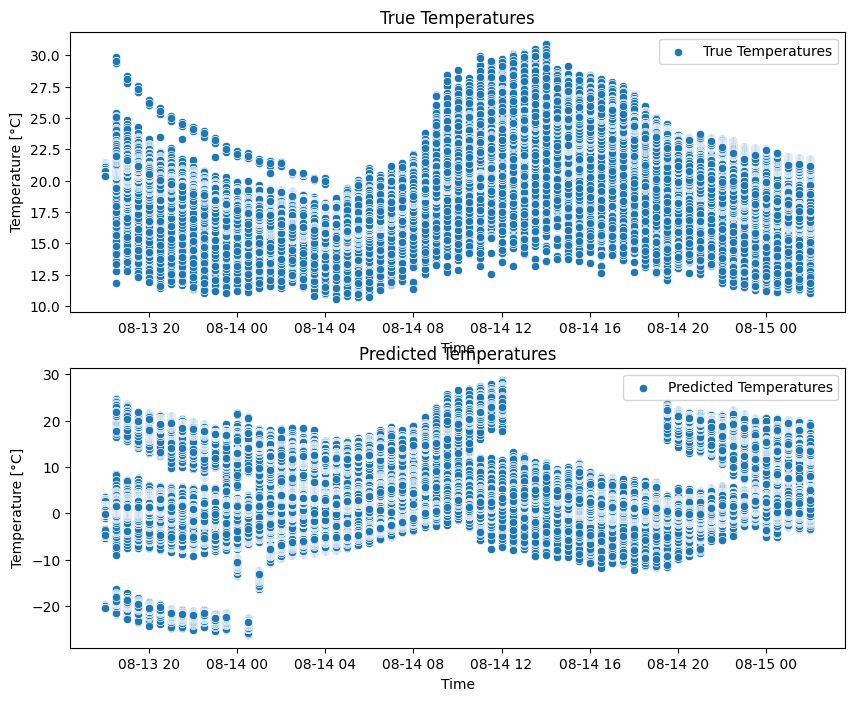

In [27]:
times = pd.to_datetime(inferencedata['datetime'].flatten())
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
ax1 = sns.scatterplot(x=times, y=true_temp.flatten(), ax=axs[0], label='True Temperatures')
ax1.set_ylabel('Temperature [°C]')
ax1.set_xlabel('Time')
ax1.set_title('True Temperatures')
ax2 = sns.scatterplot(x=times, y=error_list, ax=axs[1], label='Predicted Temperatures')
ax2.set_ylabel('Temperature [°C]')
ax2.set_xlabel('Time')
ax2.set_title('Predicted Temperatures')

Text(0.5, 1.0, 'Errors')

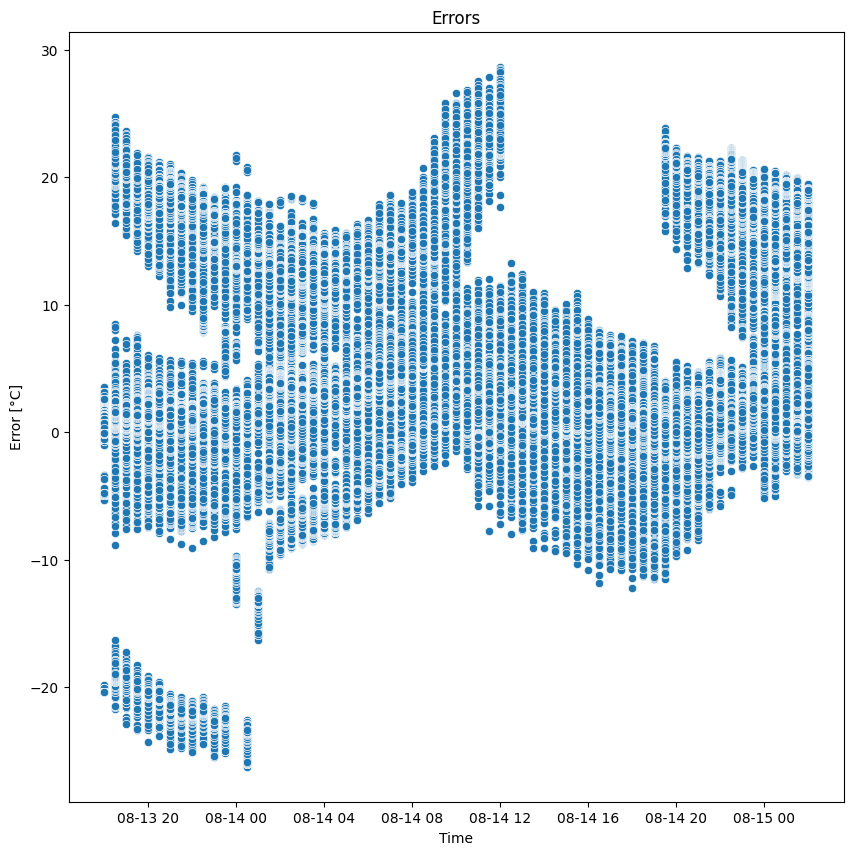

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(x=times, y=error_list)
ax.set_ylabel('Error [°C]')
ax.set_xlabel('Time')
ax.set_title('Errors')

### Error Maps
To begin, we generate and save images of each of the timesteps, with which a gif is 

In [62]:
from importlib import reload
reload(vis)

<module 'vis' from 'c:\\Users\\ushe\\VSCode\\meteoblueQRF\\analyses_and_visualisations\\vis.py'>

In [60]:
vis.data_imgs(error_maps, inferencedata['datetime'][:, 0, 0], os.path.join(resultdir, 'error_maps'), 'error')

In [63]:
savepath = os.path.join(resultdir, 'error_maps')
vis.data_gif(savepath, 'error')